**Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

Here you will be learning how to do data cleaning.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_excel('Week1_challenge_data_source.xlsx', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [3]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [4]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


#### Data cleaning utils

In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

##### Handling Missing Values

In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 12.49 % missing values.


In [7]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [8]:
# drop columns with more than 30% missing values: meaning 50 thousand missing and plus
df_clean = db.drop(["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B", "Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol DL < 31250B", "Nb of sec with 6250B < Vol UL < 37500B"], axis=1)
df_clean.shape

(150001, 45)

In [9]:
missing_values_table(df_clean)

Your selected dataframe has 45 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27829,18.6,float64
Avg RTT UL (ms),27812,18.5,float64
Last Location Name,1153,0.8,object
MSISDN/Number,1066,0.7,float64
Nb of sec with Vol UL < 1250B,793,0.5,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.5,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.5,float64
UL TP < 10 Kbps (%),792,0.5,float64
UL TP > 300 Kbps (%),792,0.5,float64
Nb of sec with Vol DL < 6250B,755,0.5,float64


In [10]:
# Checking that those columns are droped

df_clean.isna().sum()   

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

In [12]:
# Filling missings with column average
df_clean = df_clean.fillna(df_clean.mean())

##### Fixing outliers

In [13]:
df_clean["Google DL (Bytes)"] = fix_outlier(df_clean, "Google DL (Bytes)")
df_clean["Google UL (Bytes)"] = fix_outlier(df_clean, "Google UL (Bytes)")
df_clean["Email DL (Bytes)"] = fix_outlier(df_clean, "Email DL (Bytes)")
df_clean["Email UL (Bytes)"] = fix_outlier(df_clean, "Email UL (Bytes)")

df_clean["Youtube DL (Bytes)"] = fix_outlier(df_clean, "Youtube DL (Bytes)")
df_clean["Youtube UL (Bytes)"] = fix_outlier(df_clean, "Youtube UL (Bytes)")

df_clean["Netflix DL (Bytes)"] = fix_outlier(df_clean, "Netflix DL (Bytes)")
df_clean["Netflix UL (Bytes)"] = fix_outlier(df_clean, "Netflix UL (Bytes)")

df_clean["Gaming DL (Bytes)"] = fix_outlier(df_clean, "Gaming DL (Bytes)")
df_clean["Gaming UL (Bytes)"] = fix_outlier(df_clean, "Gaming UL (Bytes)")

df_clean["Other DL (Bytes)"] = fix_outlier(df_clean, "Other DL (Bytes)")
df_clean["Other UL (Bytes)"] = fix_outlier(df_clean, "Other UL (Bytes)")

In [14]:
df_clean["Avg RTT DL (ms)"] = fix_outlier(df_clean, "Avg RTT DL (ms)")
df_clean["Avg RTT UL (ms)"] = fix_outlier(df_clean, "Avg RTT UL (ms)")
df_clean["Avg Bearer TP DL (kbps)"] = fix_outlier(df_clean, "Avg Bearer TP DL (kbps)")
df_clean["Avg Bearer TP UL (kbps)"] = fix_outlier(df_clean, "Avg Bearer TP UL (kbps)")

df_clean["Total UL (Bytes)"] = fix_outlier(df_clean, "Total UL (Bytes)")
df_clean["Total DL (Bytes)"] = fix_outlier(df_clean, "Total DL (Bytes)")

In [15]:
df_clean.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,64.502668,10.440744,8885.019374,825.942517,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.480235e+06,1.958550e+06,1.706573e+06,445027.912064,1.108115e+07,1.048741e+07,1.107545e+07,1.047831e+07,4.020944e+08,7.895643e+06,4.010862e+08,7.871300e+06,3.999088e+07,4.346131e+08
std,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,38.469858,9.169703,15604.802008,1715.491430,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,5.696376e+06,4.643215e+06,8.103734e+07,9148.498009,10133.431600,1.035482e+06,19006.178256,3.066559e+06,1.102020e+06,9.592946e+05,249877.332824,6.214944e+06,5.876459e+06,6.230618e+06,5.889804e+06,2.260530e+08,4.430545e+06,2.251687e+08,4.414398e+06,9.986794e+06,2.261013e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487800e+04,2.154000e+04,5.744206e+07,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930500e+04,4.679400e+04,8.639998e+07,205.000000,220.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,106.000000,17.662883,12495.000000,767.000000,100.000000,4.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,6.796110e+05,5.991140e+05,1.324307e+08,2765.000000,2560.000000,2.694938e+06,49334.000000,8.061127e+06,2.878956e+06,2.511516e+06,653042.000000,1.629000e+07,1.541473e+07,1.629095e+07,1.541268e+07,5.906391e+08,1.160444e+

#### Transforming Data: Scaling data

Scaling: changing the range of your data, while

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler()
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total UL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total UL (Bytes)']])

# df_clean[['Avg RTT DL (ms']] = minmax_scaler.fit_transform(df_clean[['Avg RTT DL (ms']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])


(array([15077., 14936., 14861., 15177., 15038., 14896., 15182., 14961.,
        14933., 14940.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

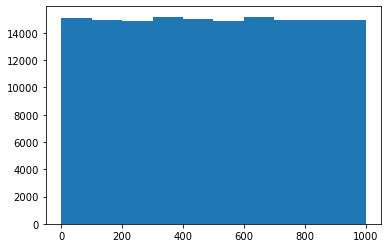

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df_clean['Start ms'])

## Task 1 - User Overview analysis 


##### 1. Start by identifying the top 10 handsets used by the customers.

*  Variables:  Handset Type

In [18]:
Top10_Handset=df_clean['Handset Type'].value_counts()
Top10_Handset.head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [19]:
# #find frequency of each 'Handset Type
# pd.crosstab(index=df_clean['Handset Type'], columns='count')

#### 2. Then, identify the top 3 handset manufacturers: Handsets frequencies and get top 3

* Variables:         Handset Manufacturer




In [20]:
Top3_Handset_Manufacturer=df_clean['Handset Manufacturer'].value_counts()
Top3_Handset_Manufacturer

Apple                                           59565
Samsung                                         40839
Huawei                                          34423
undefined                                        8987
Sony Mobile Communications Ab                     980
                                                ...  
Compal Electronics Inc                              1
Kazam Mobile Limited                                1
Cisco Systems Inc (Including All Affiliates)        1
Wct                                                 1
Essential Products Inc.                             1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [21]:
Top3_Handset_Manufacturer.head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

#### 3. Next, identify the top 5 handsets per top 3 handset manufacturer
* Variables: Handset Type and Handset Manufacturer

* Creating subdasets for top 3 manufacturers


In [22]:
Top3HandsetApple = df_clean.loc[df_clean['Handset Manufacturer'] == "Apple"]
Top3HandsetSamsung = df_clean.loc[df_clean['Handset Manufacturer'] == "Samsung"]
Top3HandsetHuawei = df_clean.loc[df_clean['Handset Manufacturer'] == "Huawei"]
Top3HandsetHuawei.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,102.0,5.0,22.0,38.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,9785.0,316210.0,1.035262e+09,Huawei,Huawei Mate 20 Lite,33.0,655.0,1623509.0,1482.0,1837897.0,3068975.0,1838947.0,252032.0,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,421803006.0,10649768.0,47925246.0,70562047.0
11,13114483557479700480,2019-04-15 11:33:39,626.0,2019-04-25 18:44:14,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,28305.0,6500.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,2623085.0,2632442.0,8.898349e+08,Huawei,Huawei B593S-22,5566.0,7852.0,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
20,13042425955912400896,2019-04-17 00:35:20,363.0,2019-04-25 04:52:49,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,54.0,43.0,29501.0,10557.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,3813488.0,2505174.0,7.066493e+08,Huawei,Huawei E5180,14793.0,10565.0,3184530.0,9277.0,10719953.0,36395.0,141717.0,466250.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
25,13114483519088500736,2019-04-17 10:17:52,47.0,2019-04-24 23:27:28,907.0,652176.0,2.082017e+14,3.377042e+10,8.690840e+13,T76876B,63.0,4.0,22.0,35.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1109.0,47589.0,6.521769e+08,Huawei,Huawei P20 Pro,5.0,99.0,2868478.0,6873.0,8992480.0,2302073.0,112113.0,824843.0,18661053.0,4842355.0,10267242.0,6017869.0,447183598.0,8580676.0,316854859.0,8945069.0,31519758.0,488084964.0
30,13042425955912400896,2019-04-18 00:35:20,711.0,2019-04-25 04:52:49,691.0,620248.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,54.0,22.0,26037.0,7205.0,89.0,5.0,2.0,2.0,98.0,1.0,0.0,0.0,2131832.0,1606322.0,6.202490e+08,Huawei,Huawei E5180,9763.0,6569.0,2370650.0,53206.0,2025553.0,967151.0,1803443.0,812075.0,1843883.0,15098966.0,12173853.0,10598373.0,366103099.0,13276512.0,195717525.0,14209340.0,55015623.0,386320481.0


In [23]:
# Top 5 handsets for Apple
Top3HandsetApple['Handset Type'].value_counts().head(5)


Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [24]:
# Top 5 handsets for Samsung
Top3HandsetSamsung['Handset Type'].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [25]:
# Top 5 handsets for Huawei
Top3HandsetHuawei['Handset Type'].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

#### 4. Make a short interpretation and recommendation to marketing teams

The top 3 manufactutrers of handsets are: Apple, Samsung and Huawei.
The Apple produced 59565 handsets, mainly being for Apple iPhone 6S (A1688) and Apple iPhone 6 (A1586)   with  9419 and 9023 products respectively.

The Samsung  produced 40839 handsets, dominated mainly by Samsung Galaxy S8 (Sm-G950F) and Samsung Galaxy A5 Sm-A520F  with 4520 and 3724 produced respectively.
The third one, was Huawei which produced 34423 handsets, with Huawei B528S-23A  and Huawei E5180 being main produced counting for 19752 and 2079 respectively.

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications. 

#### Aggregate per user the following information in the column


* number of xDR sessions per users


* Session duration per users


In [26]:
# bearer id	xDr session identifier
df_clean.groupby("MSISDN/Number")['Bearer Id'].count()

MSISDN/Number
3.360100e+10       1
3.360100e+10       1
3.360100e+10       1
3.360101e+10       1
3.360101e+10       2
                ... 
3.379000e+10       1
4.188282e+10    1066
3.197021e+12       1
3.370000e+14       1
8.823971e+14       1
Name: Bearer Id, Length: 106857, dtype: int64

In [27]:
df_clean.groupby("MSISDN/Number")['Bearer Id'].describe()

,count,unique,top,freq
MSISDN/Number,,,,
3.360100e+10,1,1,13114483554762799104,1
3.360100e+10,1,1,7349883260786089984,1
3.360100e+10,1,1,7349883263388680192,1
3.360101e+10,1,1,13042425972781099008,1
3.360101e+10,2,2,7277825655840339968,1
...,...,...,...,...
3.379000e+10,1,1,13114483558421200896,1
4.188282e+10,1066,502,,562
3.197021e+12,1,1,7277825624788950016,1


In [28]:
df_clean["MSISDN/Number"].describe()

count    1.500010e+05
mean     4.188282e+10
std      2.438731e+12
min      3.360100e+10
25%      3.365151e+10
50%      3.366380e+10
75%      3.368473e+10
max      8.823971e+14
Name: MSISDN/Number, dtype: float64


* the total download (DL) and upload (UL) data per Users


In [29]:
# TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
# TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)


# Avg RTT DL (ms) 
# Avg RTT UL (ms)
df_clean.groupby("MSISDN/Number")['Avg RTT DL (ms)'].mean()

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     30.000000
3.360100e+10    109.795706
3.360101e+10     69.000000
3.360101e+10     57.000000
                   ...    
3.379000e+10     34.000000
4.188282e+10     77.275990
3.197021e+12    109.795706
3.370000e+14    109.795706
8.823971e+14    109.795706
Name: Avg RTT DL (ms), Length: 106857, dtype: float64

In [30]:
df_clean['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.502668
std          38.469858
min           0.000000
25%          35.000000
50%          54.000000
75%         106.000000
max         227.000000
Name: Avg RTT DL (ms), dtype: float64

In [31]:
df_clean.groupby("MSISDN/Number")['Avg RTT UL (ms)'].mean()

MSISDN/Number
3.360100e+10     0.000000
3.360100e+10     1.000000
3.360100e+10    17.662883
3.360101e+10    15.000000
3.360101e+10     2.500000
                  ...    
3.379000e+10     6.000000
4.188282e+10    11.896772
3.197021e+12    17.662883
3.370000e+14    17.662883
8.823971e+14    17.662883
Name: Avg RTT UL (ms), Length: 106857, dtype: float64

In [32]:
df_clean['Avg RTT UL (ms)'].describe()

count    150001.000000
mean         10.440744
std           9.169703
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max          44.000000
Name: Avg RTT UL (ms), dtype: float64

In [33]:
df_clean.groupby("MSISDN/Number")['Avg Bearer TP DL (kbps)'].mean()

MSISDN/Number
3.360100e+10       37.000000
3.360100e+10       48.000000
3.360100e+10       48.000000
3.360101e+10      204.000000
3.360101e+10    20197.500000
                    ...     
3.379000e+10       68.000000
4.188282e+10    11396.433439
3.197021e+12        1.000000
3.370000e+14       11.000000
8.823971e+14        2.000000
Name: Avg Bearer TP DL (kbps), Length: 106857, dtype: float64

In [34]:
df_clean.groupby("MSISDN/Number")['Avg Bearer TP UL (kbps)'].mean()

MSISDN/Number
3.360100e+10      39.000000
3.360100e+10      51.000000
3.360100e+10      49.000000
3.360101e+10      44.000000
3.360101e+10      51.500000
                   ...     
3.379000e+10      48.000000
4.188282e+10    1046.184267
3.197021e+12       0.000000
3.370000e+14      22.000000
8.823971e+14       0.000000
Name: Avg Bearer TP UL (kbps), Length: 106857, dtype: float64


* the total data volume (in Bytes) during this session for each application per Users

In [35]:
# Variables: 
# Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
# Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

df_clean.groupby("MSISDN/Number")['Total DL (Bytes)'].sum()

MSISDN/Number
3.360100e+10    4.558409e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    4.445751e+08
4.188282e+10    4.650024e+11
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106857, dtype: float64

In [36]:
df_clean['Total DL (Bytes)'].describe()

count    1.500010e+05
mean     4.346131e+08
std      2.261013e+08
min      7.114041e+06
25%      2.431072e+08
50%      4.558409e+08
75%      6.232560e+08
max      8.342894e+08
Name: Total DL (Bytes), dtype: float64

In [37]:
df_clean.groupby("MSISDN/Number")['Total UL (Bytes)'].sum()

MSISDN/Number
3.360100e+10    3.605311e+07
3.360100e+10    3.610446e+07
3.360100e+10    3.930682e+07
3.360101e+10    2.032753e+07
3.360101e+10    9.428053e+07
                    ...     
3.379000e+10    3.573224e+07
4.188282e+10    4.318604e+10
3.197021e+12    3.729592e+07
3.370000e+14    5.665284e+07
8.823971e+14    4.114324e+07
Name: Total UL (Bytes), Length: 106857, dtype: float64

In [38]:
df_clean['Total UL (Bytes)'].describe()

count    1.500010e+05
mean     3.999088e+07
std      9.986794e+06
min      2.866892e+06
25%      3.322203e+07
50%      4.114324e+07
75%      4.728190e+07
max      5.973914e+07
Name: Total UL (Bytes), dtype: float64

Fields	Description
bearer id	xDr session identifier
Dur. (ms)	Total Duration of the xDR (in ms)


In [39]:
df_clean["Bearer Id"].value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
                       ... 
13042425959245500416      1
13114483564761300992      1
7277825665743110144       1
7277825669917429760       1
13114483555887499264      1
Name: Bearer Id, Length: 134709, dtype: int64

In [40]:
df_clean["Bearer Id"].describe()

count     150001
unique    134709
top             
freq         991
Name: Bearer Id, dtype: object

### Task 1.2 - Conduct an exploratory data analysis on those data

* Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

#### Utils

In [41]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(20, 15))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.4f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
pd.options.display.float_format = format_float

#### You’re expected to report about the following using  python script and slide  :


* Describe all  relevant variables and associated data types (slide). 


* Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [42]:
df_clean.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,499.19,498.80,"104,608.56","208,201,639,651,673.78","41,882,819,545.03","48,474,547,977,653.76",64.50,10.44,"8,885.02",825.94,92.84,3.07,1.72,1.61,98.53,0.78,0.15,0.08,"1,829,176.87","1,408,879.97","104,609,105.55","3,719.79","4,022.08","1,795,321.77","32,928.43","5,480,234.60","1,958,549.53","1,706,572.87","445,027.91","11,081,147.95","10,487,408.69","11,075,446.16","10,478,314.74","402,094,351.88","7,895,643.47","401,086,241.74","7,871,300.38","39,990,880.95","434,613,100.09"
std,288.61,288.10,"81,037.35","21,447,224,608.90","2,438,731,270,479.18","22,373,590,654,759.30",38.47,9.17,"15,604.80","1,715.49",13.01,6.20,4.15,4.82,4.62,3.22,1.62,1.29,"5,696,376.48","4,643,215.12","81,037,341.45","9,148.50","10,133.43","1,035,482.28","19,006.18","3,066,559.17","1,102,020.11","959,294.59","249,877.33","6,214,944.41","5,876,459.02","6,230,618.07","5,889,803.75","226,052,955.82","4,430,545.47","225,168,728.42","4,414,397.56","9,986,793.91","226,101,309.56"
min,0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,142,988.00",1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,250.00,251.00,"57,442.00","208,201,401,264,956.00","33,651,508,781.00","35,462,609,538,986.00",35.00,3.00,43.00,47.00,91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"14,878.00","21,540.00","57,442,058.00",88.00,107.00,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,029.00","243,107,173.00"
50%,499.00,500.00,"86,399.00","208,201,546,359,072.00","33,663,797,508.00","35,722,409,972,293.00",54.00,7.00,63.00,63.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"39,305.00","46,794.00","86,399,983.00",205.00,220.00,"1,794,369.00","32,920.00","5,765,829.00","2,054,573.00","1,793,505.00","466,250.00","11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00","41,143,242.00","455,840,911.00"
75%,749.00,750.00,"132,430.00","208,201,771,607,314.00","33,684,730,950.00","86,119,704,277,453.00",106.00,17.66,"12,495.00",767.00,100.00,4.00,1.00,1.00,100.00,0.00,0.00,0.00,"679,611.00","599,114.00","132,430,686.00","2,765.00","2,560.00","2,694,938.00","49,334.00","8,061,127.00","2,878,956.00","2,511,516.00","653,042.00","16,290,002.00","15,414,734.00","16,290,947.00","15,412,679.00","590,639,105.00","11,604,440.00","588,905,875.00","11,543,900.00","47,281,905.00","623,256,022.00"
max,999.00,999.00,"1,859,336.00","214,074,30

* Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [43]:
Relevant_df_clean = df_clean[["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]]
Relevant_df_clean.describe()

,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"5,480,234.60","1,958,549.53","1,706,572.87","445,027.91","11,081,147.95","10,487,408.69","11,075,446.16","10,478,314.74","402,094,351.88","7,895,643.47","401,086,241.74","7,871,300.38"
std,"3,066,559.17","1,102,020.11","959,294.59","249,877.33","6,214,944.41","5,876,459.02","6,230,618.07","5,889,803.75","226,052,955.82","4,430,545.47","225,168,728.42","4,414,397.56"
min,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00
25%,"2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00"
50%,"5,765,829.00","2,054,573.00","1,793,505.00","466,250.00","11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00"
75%,"8,061,127.00","2,878,956.00","2,511,516.00","653,042.00","16,290,002.00","15,414,734.00","16,290,947.00","15,412,679.00","590,639,105.00","11,604,440.00","588,905,875.00","11,543,900.00"
max,"10,886,474.00","3,910,628.00","3,406,776.00","889,979.00","22,077,016.00","20,898,120.00","22,074,007.00","20,911,864.00","801,527,020.00","15,731,881.00","800,830,535.00","15,718,747.00"


##### Graphical representation of data

* Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

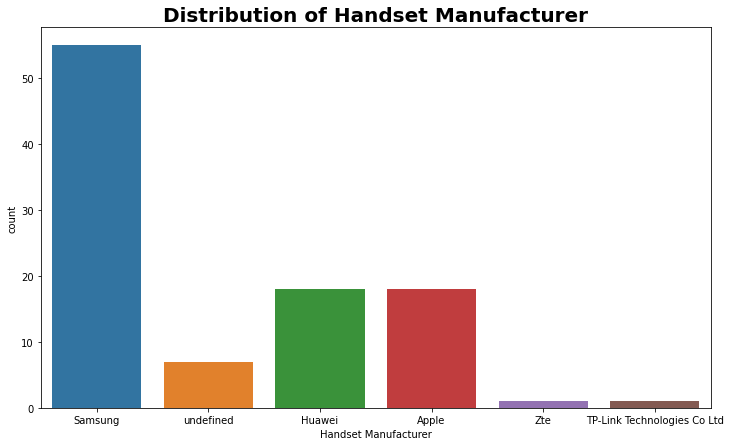

In [44]:
# Randomly selecting some rows for visualization
#plot_count(df_clean.sample(n=100), "Handset Manufacturer")
plot_count(df_clean.head(100), "Handset Manufacturer")

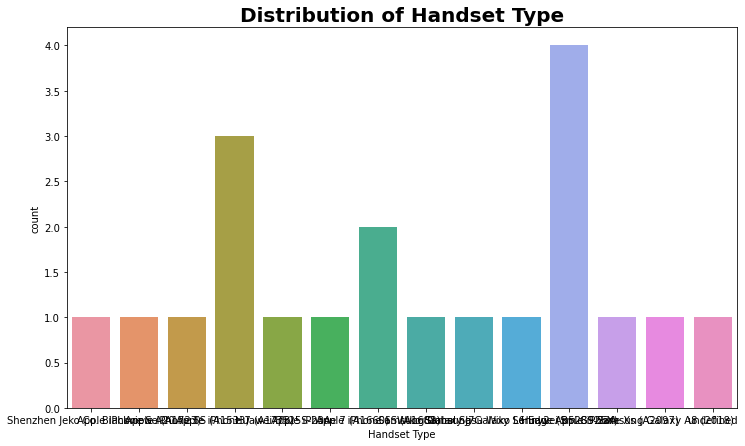

In [45]:
plot_count(df_clean.sample(20), "Handset Type")

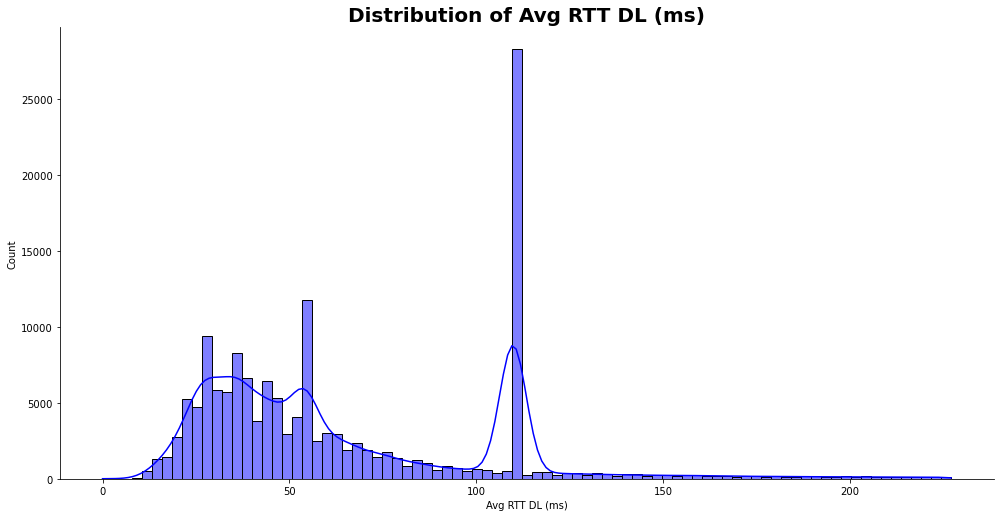

In [46]:
plot_hist(df_clean, "Avg RTT DL (ms)", "blue")


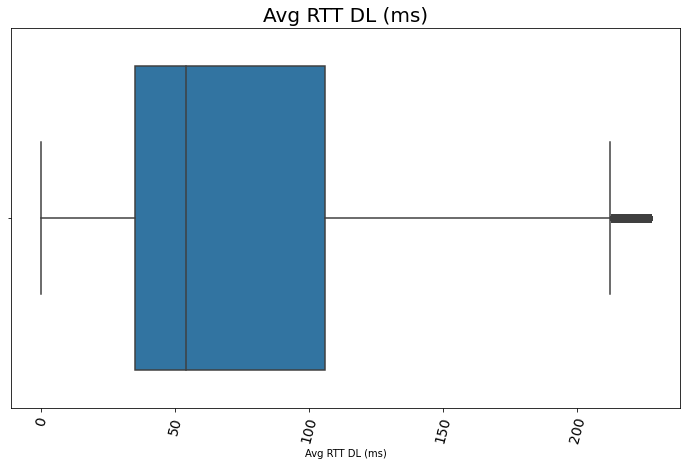

In [47]:
plot_box(df_clean, "Avg RTT DL (ms)", "Avg RTT DL (ms)")

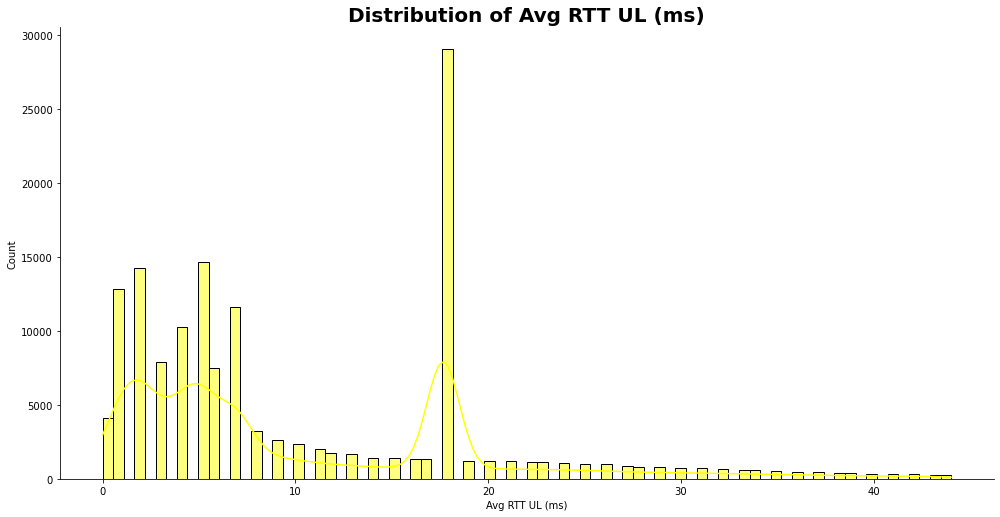

In [48]:
plot_hist(df_clean, "Avg RTT UL (ms)", "yellow")

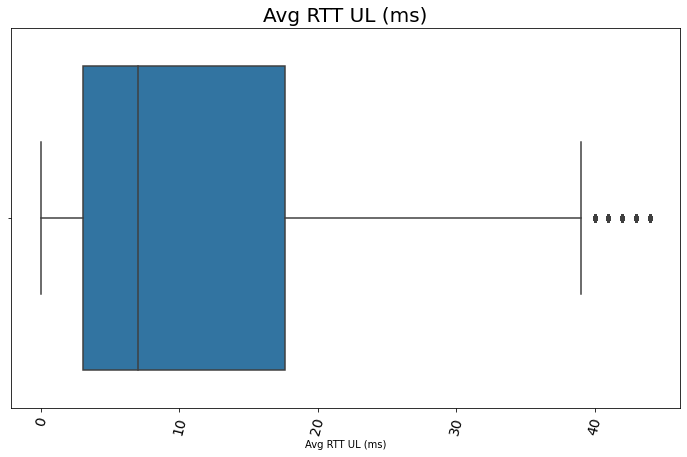

In [49]:
plot_box(df_clean, "Avg RTT UL (ms)", "Avg RTT UL (ms)")

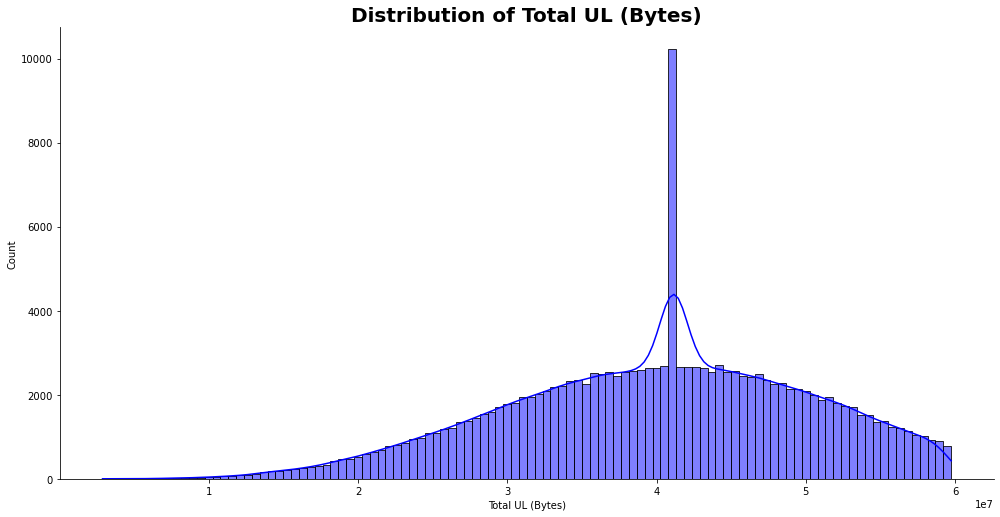

In [50]:
plot_hist(df_clean, "Total UL (Bytes)", "blue")

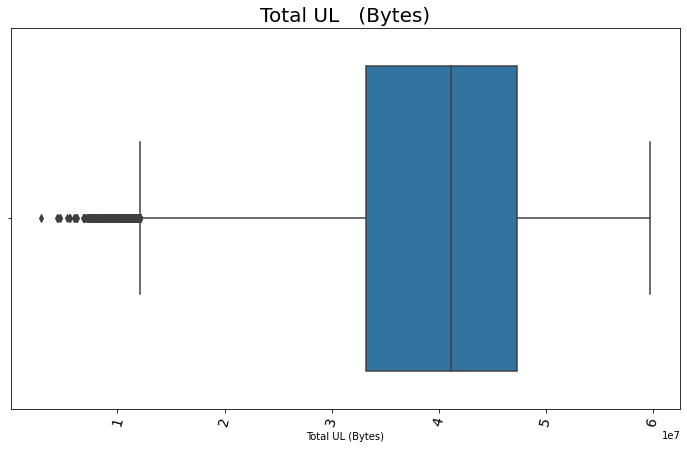

In [51]:
plot_box(df_clean, "Total UL (Bytes)", "Total UL   (Bytes)")

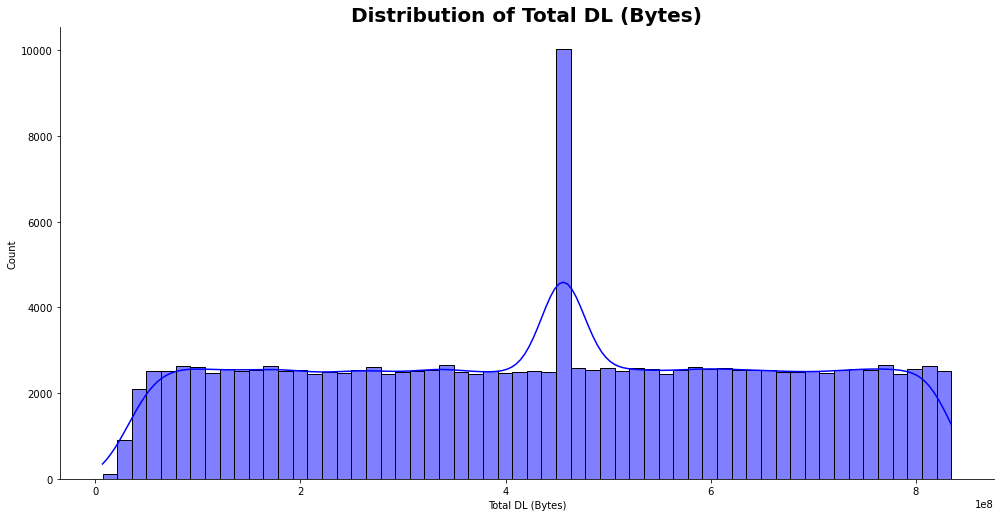

In [52]:
plot_hist(df_clean, "Total DL (Bytes)", "blue")

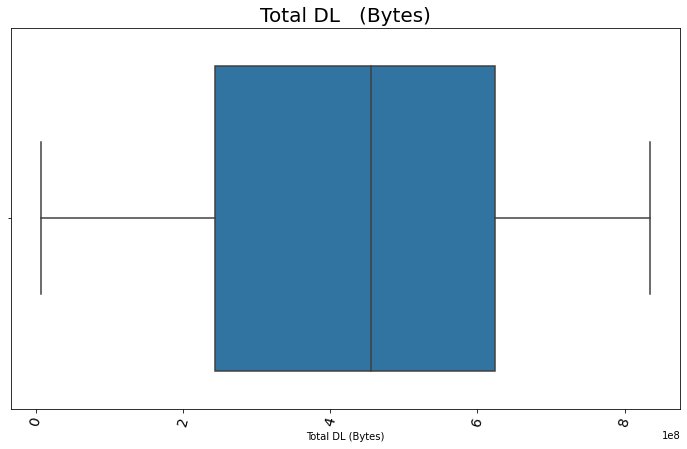

In [53]:
plot_box(df_clean, "Total DL (Bytes)", "Total DL   (Bytes)")

#### Additional data analysis and visualizations

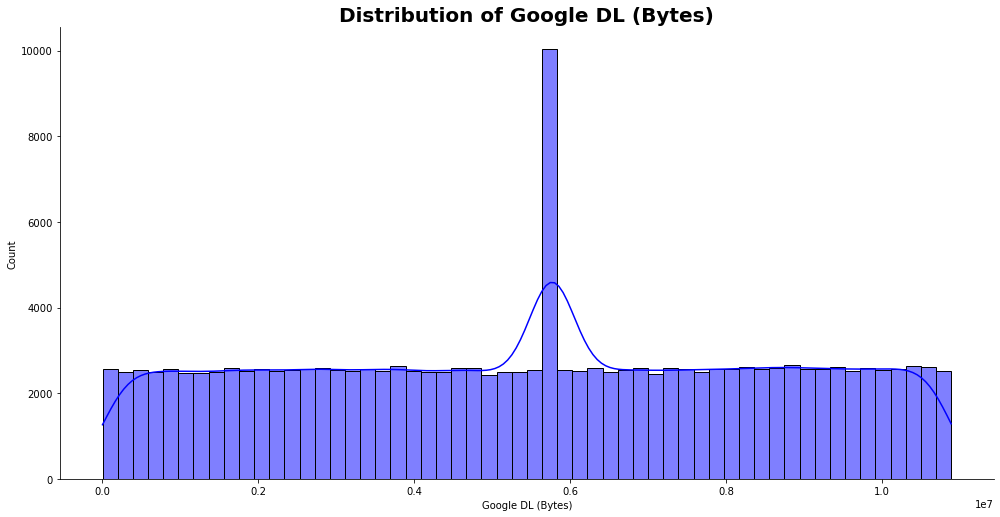

In [54]:
plot_hist(df_clean, "Google DL (Bytes)", "blue")

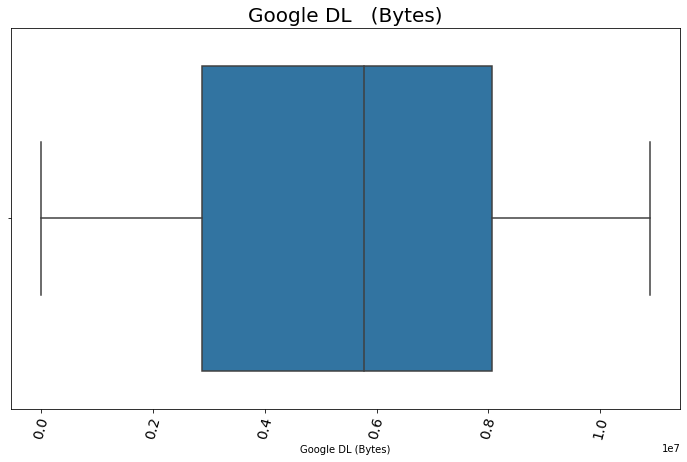

In [55]:
plot_box(df_clean, "Google DL (Bytes)", "Google DL   (Bytes)")

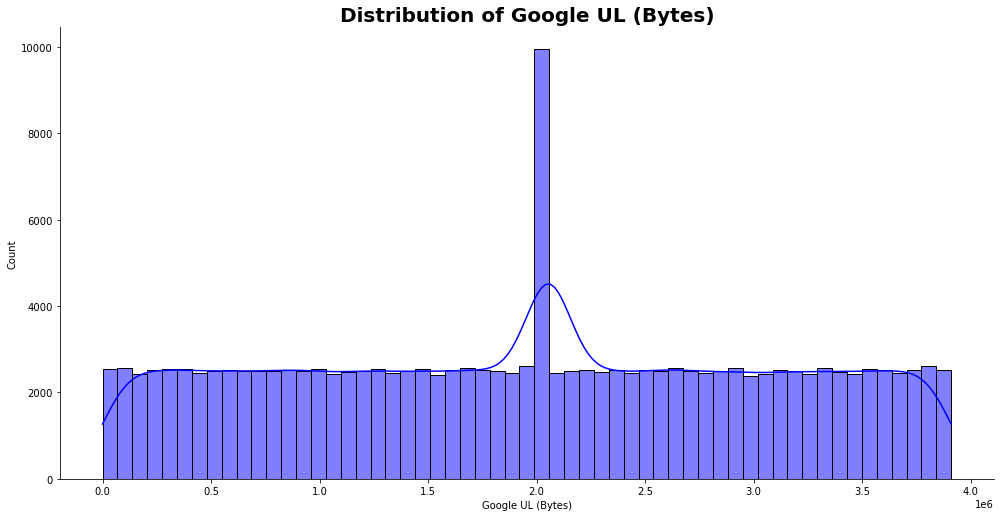

In [56]:
plot_hist(df_clean, "Google UL (Bytes)", "blue")

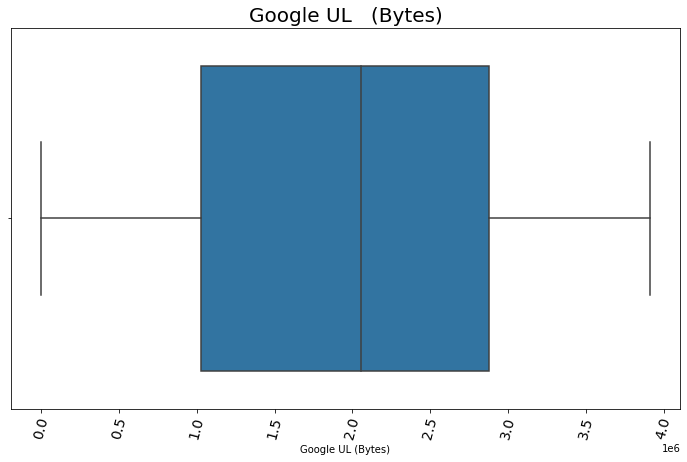

In [57]:
plot_box(df_clean, "Google UL (Bytes)", "Google UL   (Bytes)")

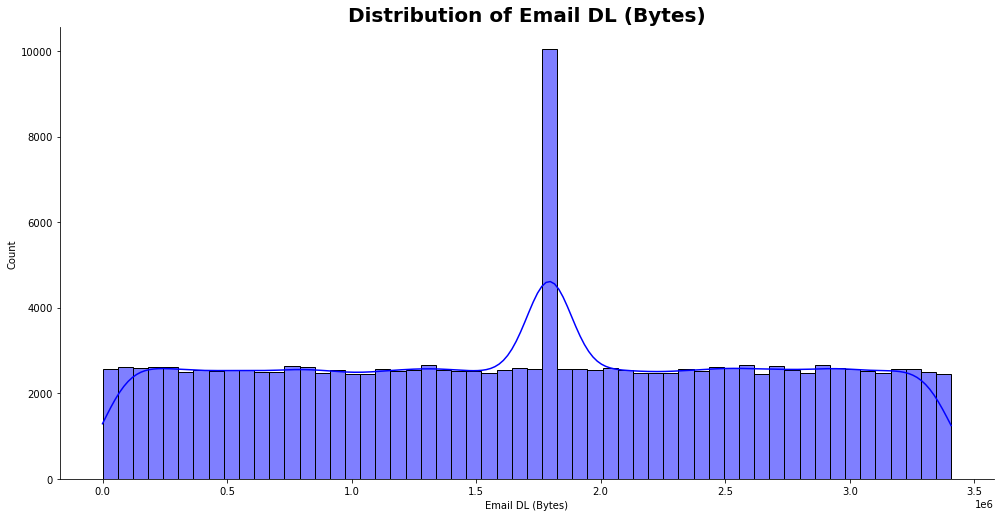

In [58]:
plot_hist(df_clean, "Email DL (Bytes)", "blue")

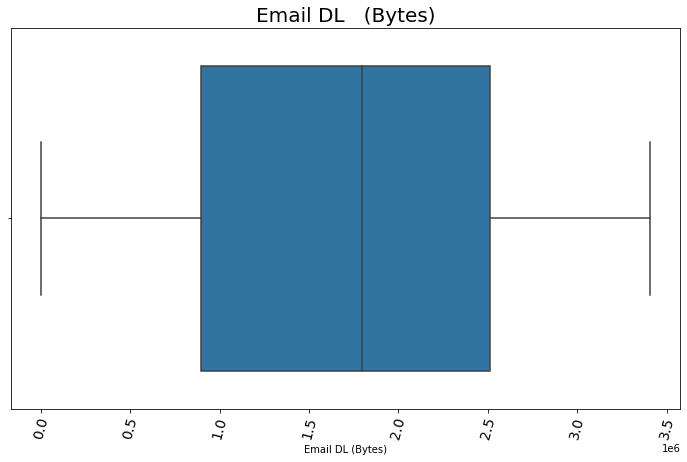

In [59]:
plot_box(df_clean, "Email DL (Bytes)", "Email DL   (Bytes)")

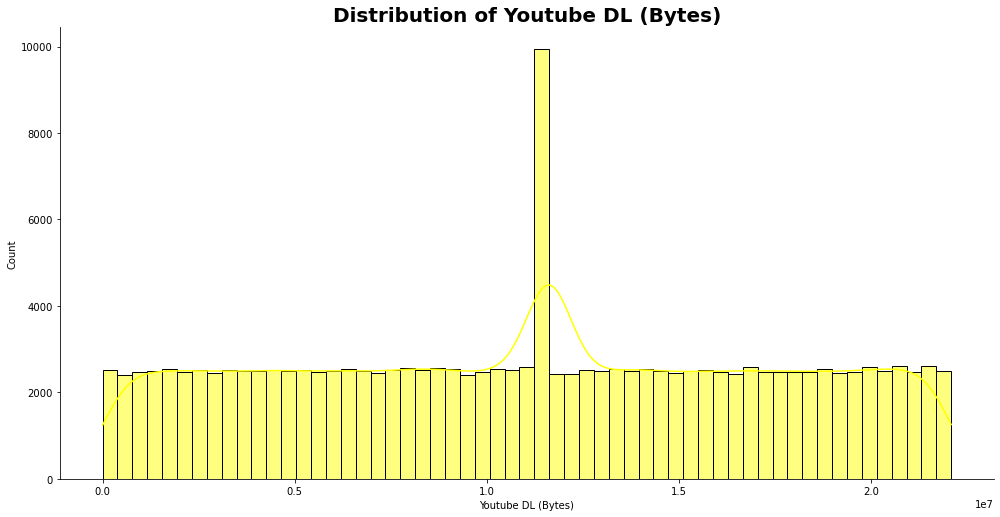

In [60]:
plot_hist(df_clean, "Youtube DL (Bytes)", "yellow")

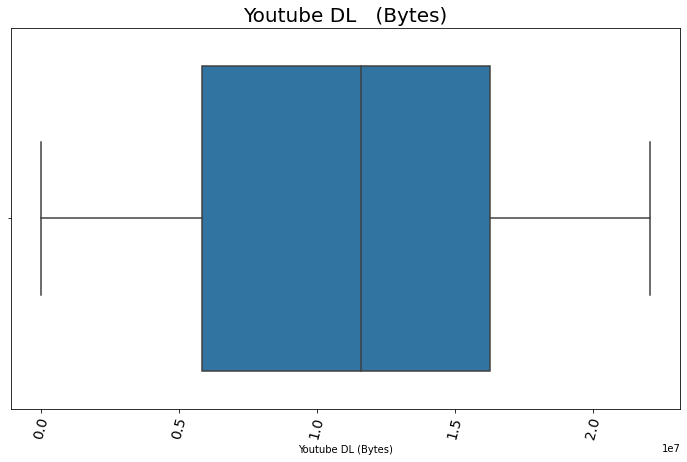

In [61]:
plot_box(df_clean, "Youtube DL (Bytes)", "Youtube DL   (Bytes)")

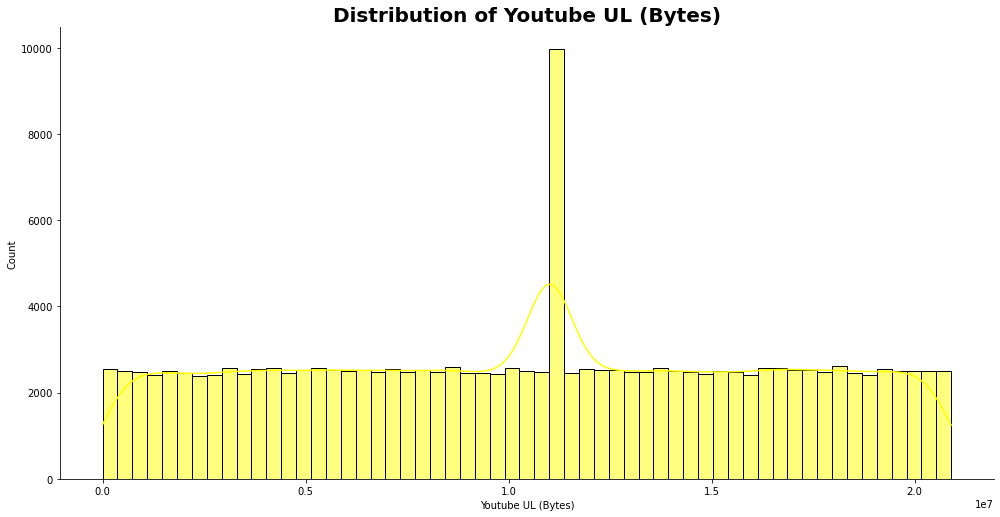

In [62]:
plot_hist(df_clean, "Youtube UL (Bytes)", "yellow")

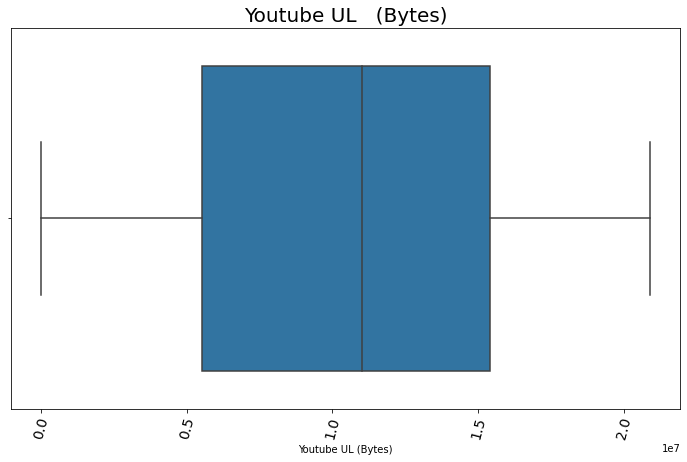

In [63]:
plot_box(df_clean, "Youtube UL (Bytes)", "Youtube UL   (Bytes)")

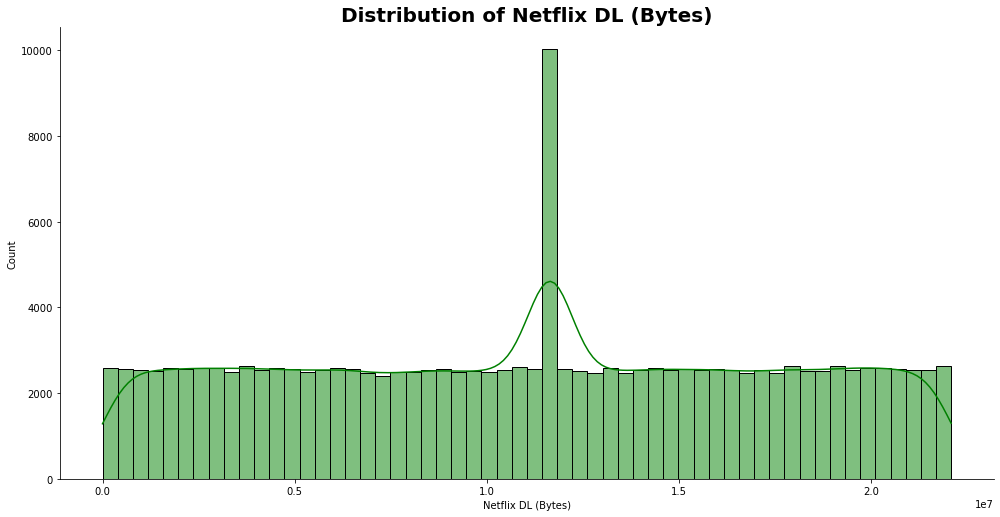

In [64]:
plot_hist(df_clean, "Netflix DL (Bytes)", "green")

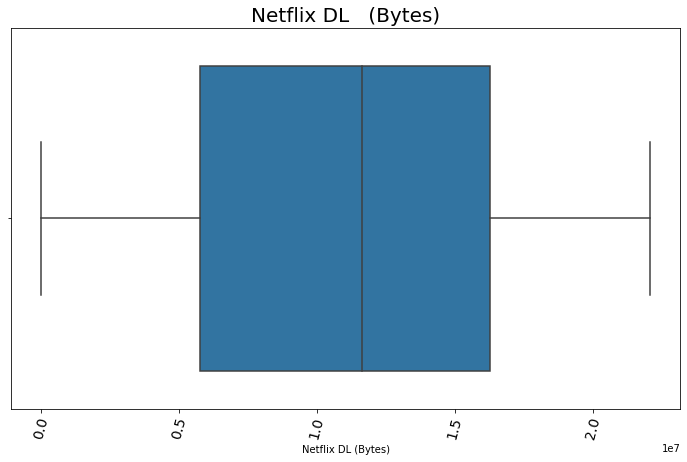

In [65]:
plot_box(df_clean, "Netflix DL (Bytes)", "Netflix DL   (Bytes)")

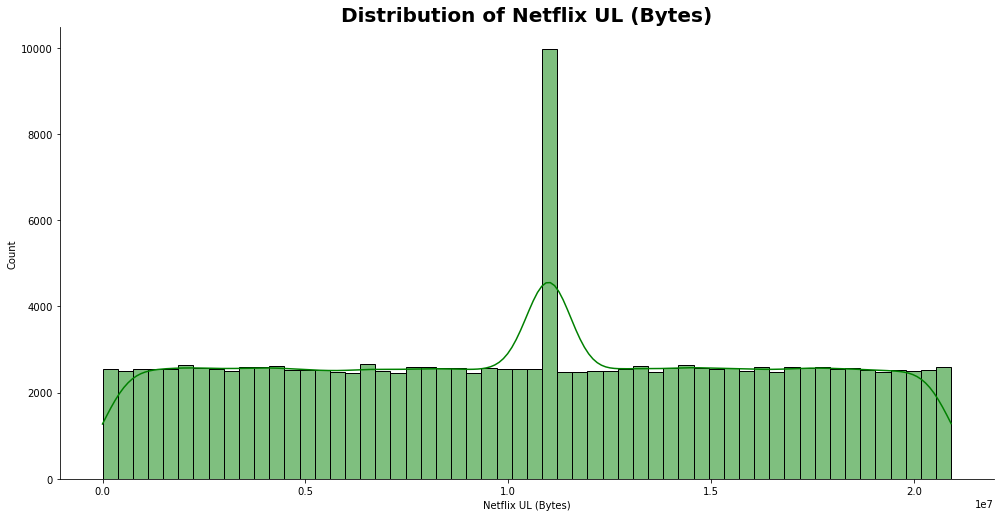

In [66]:
plot_hist(df_clean, "Netflix UL (Bytes)", "green")

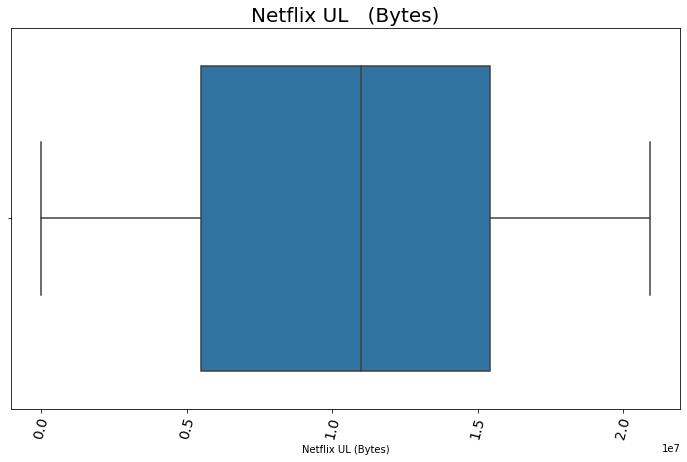

In [67]:
plot_box(df_clean, "Netflix UL (Bytes)", "Netflix UL   (Bytes)")

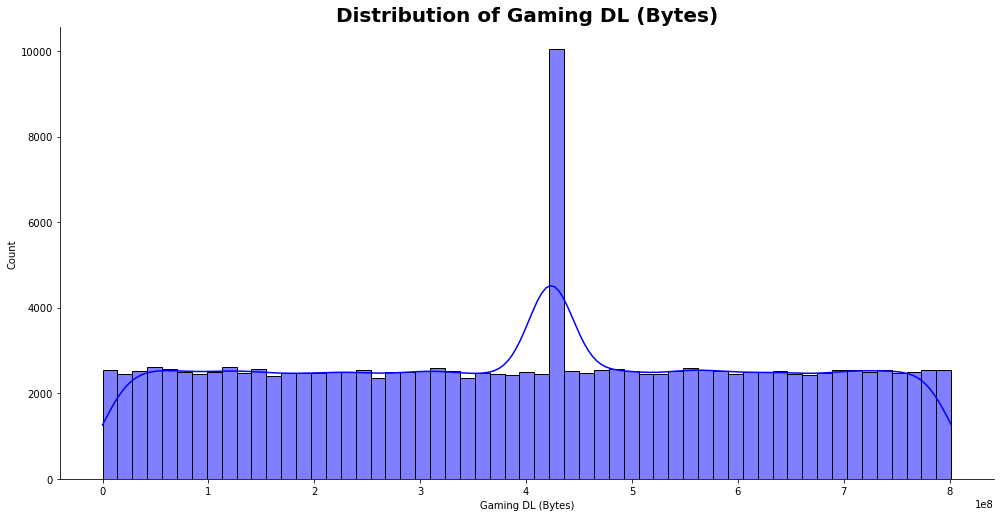

In [68]:
plot_hist(df_clean, "Gaming DL (Bytes)", "blue")

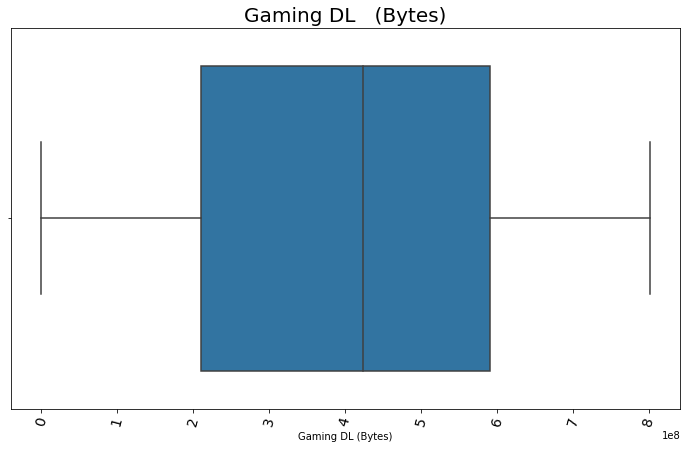

In [69]:
plot_box(df_clean, "Gaming DL (Bytes)", "Gaming DL   (Bytes)")

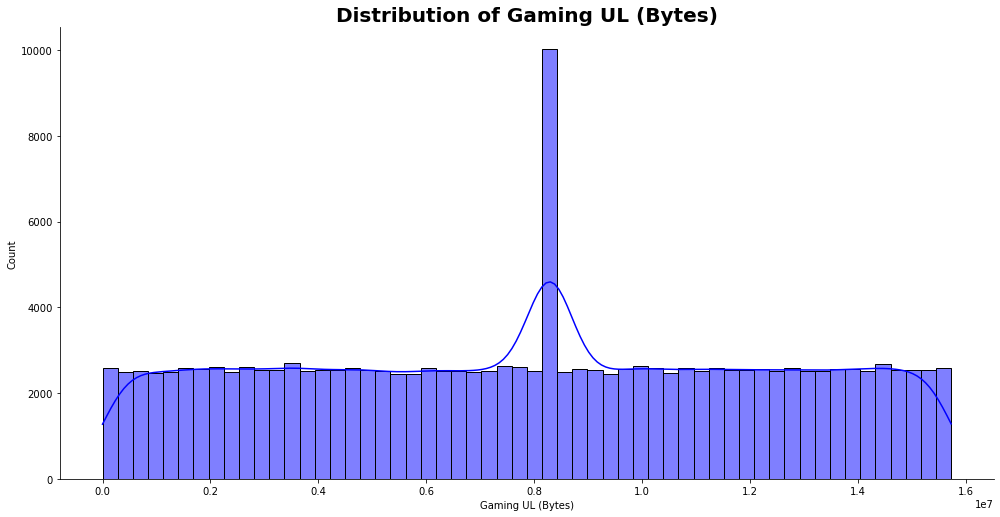

In [70]:
plot_hist(df_clean, "Gaming UL (Bytes)", "blue")

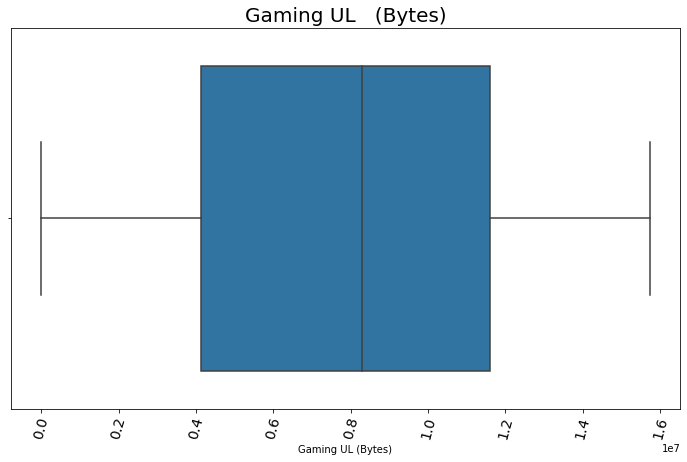

In [71]:
plot_box(df_clean, "Gaming UL (Bytes)", "Gaming UL   (Bytes)")

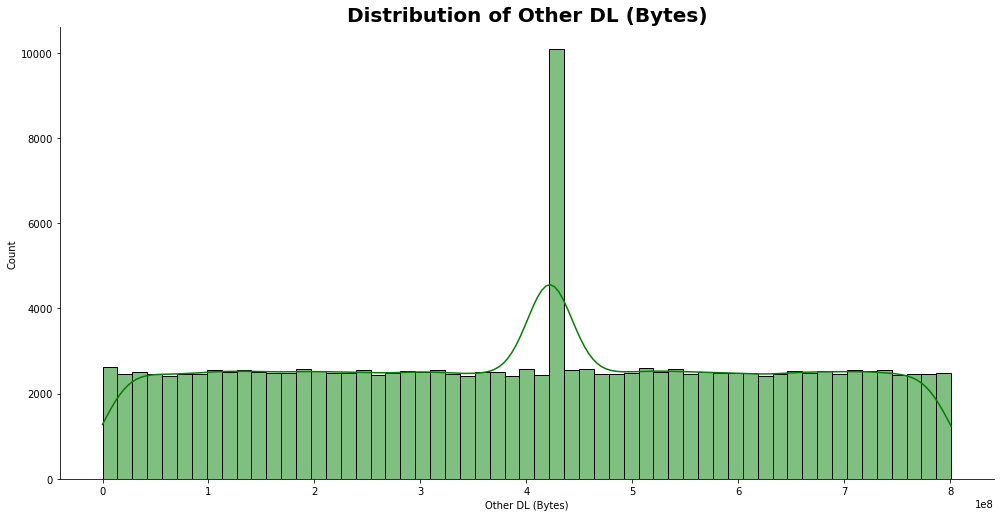

In [72]:
plot_hist(df_clean, "Other DL (Bytes)", "green")

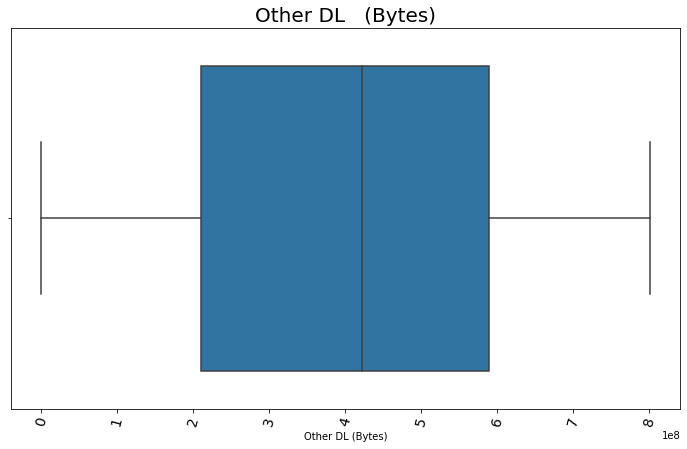

In [73]:
plot_box(df_clean, "Other DL (Bytes)", "Other DL   (Bytes)")

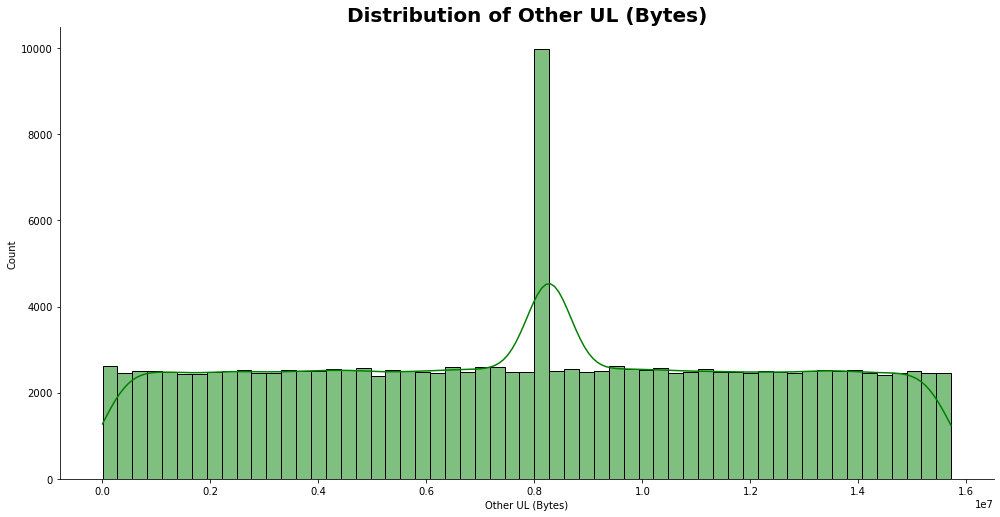

In [74]:
plot_hist(df_clean, "Other UL (Bytes)", "green")

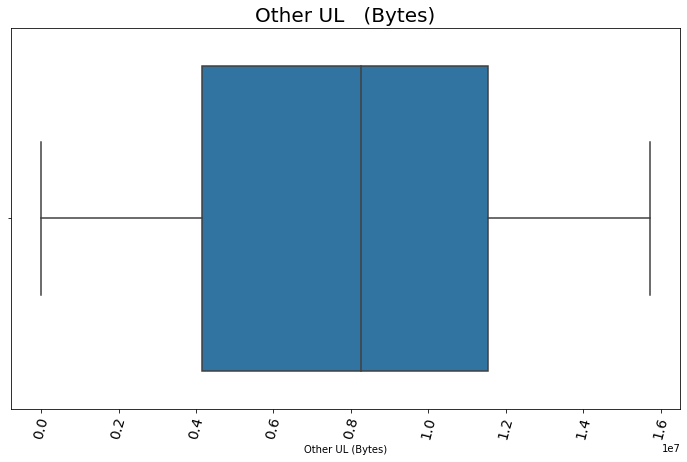

In [75]:
plot_box(df_clean, "Other UL (Bytes)", "Other UL   (Bytes)")

#### Cross tabulations and bivariate plots

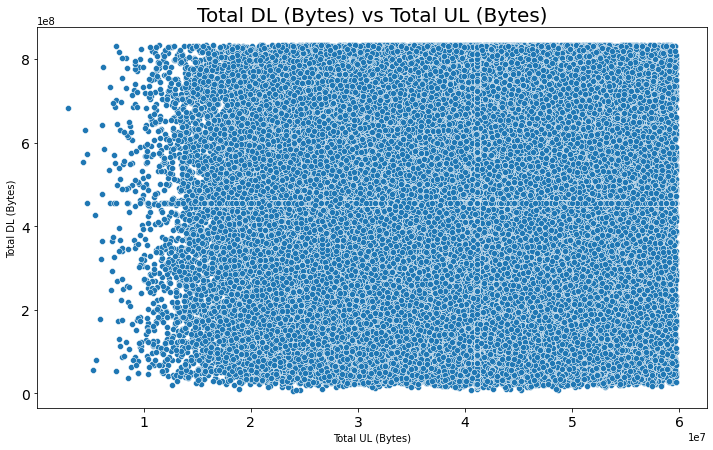

In [76]:
# Scatter plt

plt.figure(figsize=(12, 7))
sns.scatterplot(data = df_clean, x="Total UL (Bytes)", y="Total DL (Bytes)")
plt.title( "Total DL (Bytes) vs Total UL (Bytes)", size=20)
plt.xticks(fontsize=14)
plt.yticks( fontsize=14)
plt.show()

* Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

In [77]:
# pd.crosstab(df_clean["Total UL (Bytes)"], df_clean["Total DL (Bytes)"])


* Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [91]:
# adding Decile_rank column to the DataFrame
df_clean['Decile_rank'] = pd.qcut(df_clean['Dur. (ms)'], 5, labels = False)
df_clean['Total_Data'] = df_clean["Total UL (Bytes)"] + df_clean["Total DL (Bytes)"]

In [95]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Decile_rank,Total_Data
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","1,793,505.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00",4,"345,629,377.00"
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00",4,"707,185,356.00"
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,109.80,17.66,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00",4,"307,690,973.00"
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,109.80,17.66,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","455,840,911.00",4,"499,165,129.00"
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,109.80,17.66,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00",4,"607,681,403.00"


In [99]:
# Total DL (Bytes) per Decile: sum

df_clean.groupby("Decile_rank")['Total DL (Bytes)'].sum()

Decile_rank
0   13,018,349,829,424.00
1   20,719,671,308,121.00
2    5,339,196,272,945.00
3   13,034,191,838,552.08
4   13,080,990,378,146.00
Name: Total DL (Bytes), dtype: float64

In [102]:
# Total DL (Bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total DL (Bytes)'].mean()

Decile_rank
0   433,930,529.96
1   434,347,343.10
2   434,151,591.56
3   434,487,544.20
4   436,033,012.60
Name: Total DL (Bytes), dtype: float64

In [100]:
# Total UL (Bytes) per Decile: Sum

df_clean.groupby("Decile_rank")['Total UL (Bytes)'].sum()

Decile_rank
0   1,200,628,755,003.00
1   1,908,258,181,666.00
2     493,490,399,245.00
3   1,198,427,308,043.29
4   1,197,867,489,239.00
Name: Total UL (Bytes), dtype: float64

In [103]:
# Total UL (Bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total UL (Bytes)'].mean()

Decile_rank
0   40,019,624.51
1   40,002,896.71
2   40,127,695.50
3   39,948,908.57
4   39,928,916.31
Name: Total UL (Bytes), dtype: float64

In [105]:
# Total Data (bytes) per Decile : Sum
df_clean.groupby("Decile_rank")['Total_Data'].sum()

Decile_rank
0   14,218,978,584,427.00
1   22,627,929,489,787.00
2    5,832,686,672,190.00
3   14,232,619,146,595.37
4   14,278,857,867,385.00
Name: Total_Data, dtype: float64

In [106]:
# Total Data (bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total_Data'].mean()

Decile_rank
0   473,950,154.48
1   474,350,239.81
2   474,279,287.05
3   474,436,452.77
4   475,961,928.91
Name: Total_Data, dtype: float64

* Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [78]:
df_clean_corr = df_clean[["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]]
df_clean_corr

,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,"1,634,479.00","1,271,433.00","1,793,505.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00"
1,"3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00"
2,"8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00"
3,"9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00"
4,"6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"9,967,603.00","2,817,311.00","57,639.00","633,237.00","16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00"
149997,"2,229,420.00","2,185,941.00","1,954,414.00","167,304.00","13,877,234.00","8,288,284.00","19,350,146.00","10,996,384.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00"
149998,"3,850,890.00","2,734,579.00","1,525,734.00","532,543.00","11,616,019.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00"
149999,"4,189,773.00","3,567,494.00","2,228,270.00","622,644.00","8,817,106.00","8,305,402.00","3,322,253.00","13,172,589.00","352,536,971.00","2,529,475.00","421,803,006.00","1,406,930.00"


In [79]:
corrMatrix = df_clean_corr.corr()
corrMatrix

,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
Google DL (Bytes),1.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
Google UL (Bytes),0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
Email DL (Bytes),0.00,0.00,1.00,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
Email UL (Bytes),0.00,-0.00,0.01,1.00,-0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00
Youtube DL (Bytes),0.00,-0.00,0.00,-0.00,1.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
Youtube UL (Bytes),-0.00,0.00,-0.00,-0.01,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
Netflix DL (Bytes),0.00,-0.00,0.00,-0.00,0.00,-0.00,1.00,0.00,-0.01,0.00,-0.01,-0.00
Netflix UL (Bytes),-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.01,-0.00
Gaming DL (Bytes),-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,1.00,-0.00,0.00,0.00
Gaming UL (Bytes),-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,1.00,-0.00,-0.01


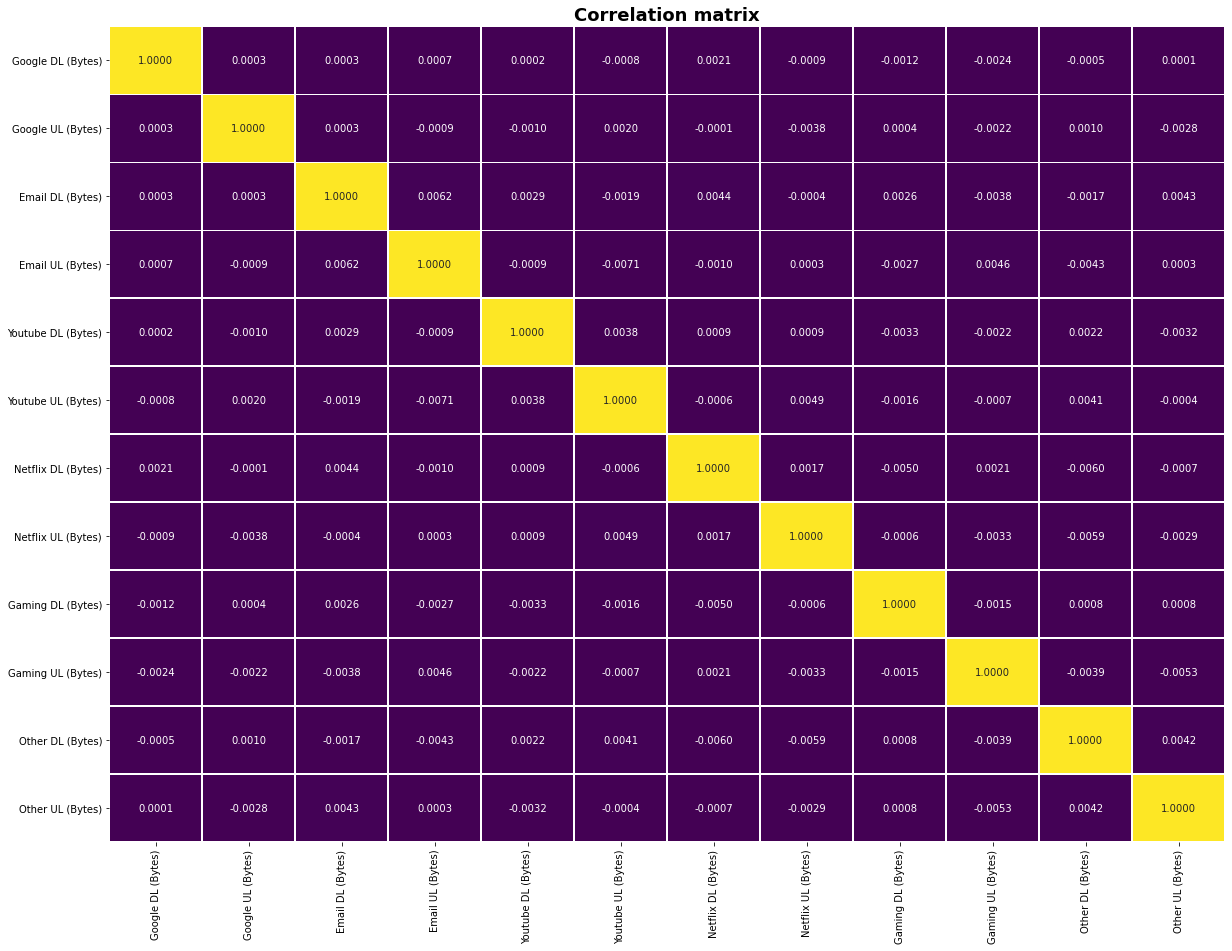

In [107]:
# Correlation heatmap

plot_heatmap(corrMatrix, "Correlation matrix", cbar=False)

Results interpretation: 
According to this hitmap of the correlation, we can see that there is no significant correlation between the data (variables) and most of them are negativelly correlated, where increase in ione corresponds to the decrease of the other.

* Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 


In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_clean_corr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [82]:
principalDf

,principal component 1,principal component 2,principal component 3
0,"147,631,264.93","214,899,435.51","2,079,064.29"
1,"-218,829,965.20","-103,196,260.31","-8,869,243.55"
2,"170,520,117.01","-27,845,430.69","-7,809,903.95"
3,"-432,097,557.87","-303,851,017.65","-4,625,872.78"
4,"-140,769,272.24","-135,462,876.55","-6,551,251.05"
...,...,...,...
149996,"-81,628,033.13","408,783,599.56","-7,688,184.61"
149997,"-256,517,138.39","-285,501,922.77","-8,718,456.29"
149998,"-120,903,222.69","294,465,592.27","1,114,345.46"
149999,"47,079,807.10","-25,855,065.93","7,992,658.41"


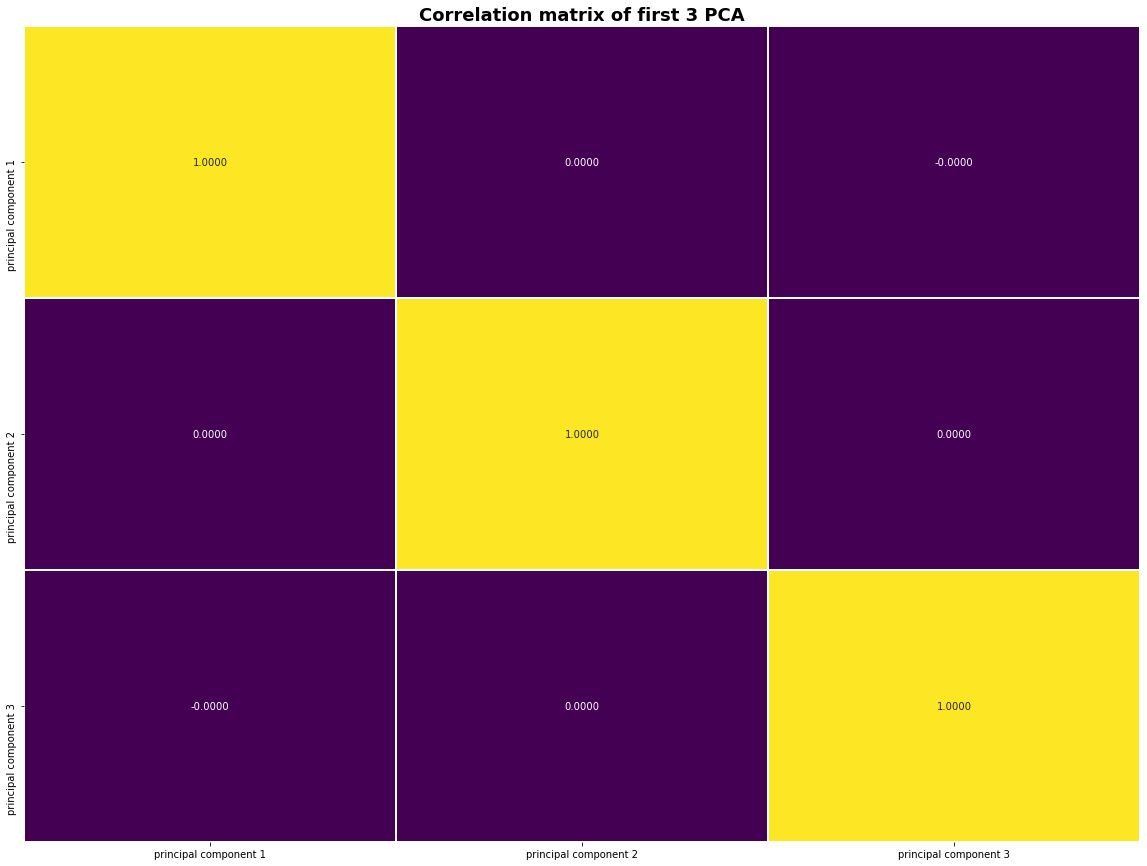

In [83]:
plot_heatmap(principalDf.corr(), "Correlation matrix of first 3 PCA", cbar=False)

## Task 2 - User Engagement analysis


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


Task 2.1 - Based on the above submit python script and slide :

* Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 


* Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 


* Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

* Aggregate user total traffic per application and derive the top 10 most engaged users per application


* Plot the top 3 most used applications using appropriate charts.  


* Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 


* What is the optimized value of k (use elbow method for this)?  


* Interpret your findings. 